# Simple Linear Regression: Application

In this notebook, we examine how to apply simple linear regression on a sample dataset containing two variables—an individual's years of experience, and their salary.

Sources:
1. <a href='https://www.udemy.com/course/machinelearning/'>Machine Learning A-Z™: Hands-On Python & R In Data Science</a>

In [1]:
# Import machine learning support
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Import analytical libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

# Import other support
import os

# style.use('ggplot')

## Load & Preview Data

In [2]:
# Define salary data file path
salary_data_file_path = os.path.join('Data', 'Salary_Data.csv')

# Load salary data
salary_data = pd.read_csv(salary_data_file_path)

In [3]:
# Preview data
print(salary_data.shape)
display(salary_data.head())
display(salary_data.describe().T)
display(salary_data.isna().sum())

(30, 2)


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


YearsExperience    0
Salary             0
dtype: int64

## Prepare Data

It is customary in machine learning to denote features—the input variables—with $X$, and the labels—the out variable—with $y$.

In [4]:
# Define features and labels
X = salary_data['YearsExperience'].values.reshape(-1,1)
y = salary_data['Salary'].values.reshape(-1,1)

# Define training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

## Prepare Regressor

Training a machine learning object (regressor or classifier) is quite straightforward.  Though we can tweak a plethora of parameters, the core of machine learning is initializing a machine learning object, then fitting it to the data.  This can be accomplished in two lines of code.  After this, we may use the test data to examine how well the model works.

In [5]:
# Initialize regression object
regressor = LinearRegression()

# Fit regressor to data
regressor.fit(X_train, y_train)

# Test classifier
print(regressor.score(X_test, y_test))

0.988169515729126


## Visualize Regressor

To visualize our data, we will first plot our known salaries from the training set with a scatter plot, then plot our regression line to examine how close it is to the actual points.

Both plots use the same input for the $x$-axis—our training years of experience.  The input for the $y$-axis will differ however.  For known values on the scatter plot, we plot the actual points, and for the regression line plot, the regression line itself will be our input.

When repeating the above for the testing set, the regression line inputs will be the same.  On both graphs, we plot the same regression line that we trained using training data, and then predicted values with using the testing set.

In [6]:
# Predict test labels
y_predict = regressor.predict(X_train)

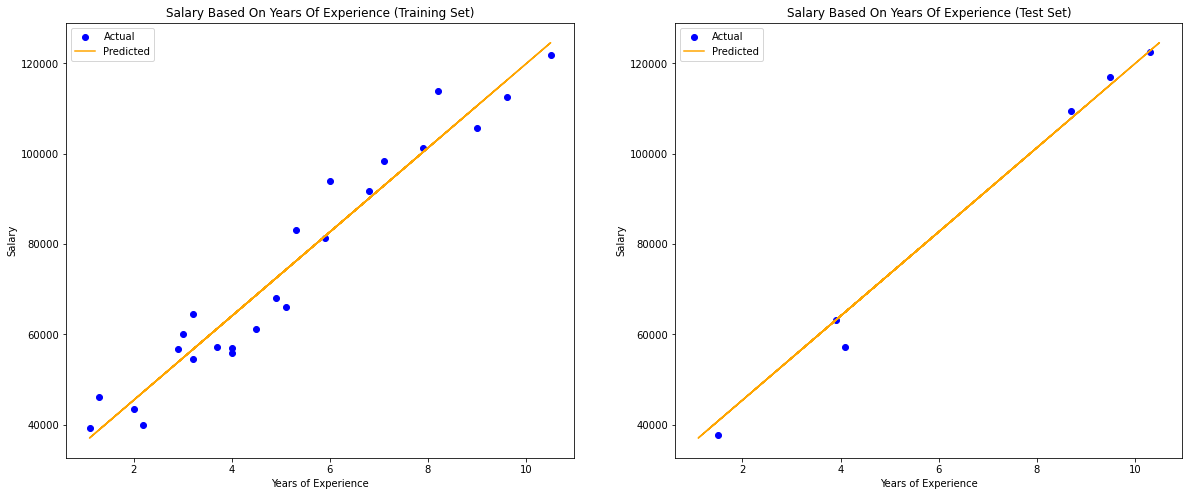

In [7]:
# Create figure
plt.figure(figsize=(20,8))

# Create subplot for training data
plt.subplot(1,2,1)

# Plot known data 
plt.scatter(X_train, y_train, label='Actual', color='blue')

# Plot predicted data
plt.plot(X_train, y_predict, label='Predicted', color='orange',)

# Define title
plt.title('Salary Based On Years Of Experience (Training Set)')

# Show Legend
plt.legend()

# Define axis labels
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

# Create subplot for testing data
plt.subplot(1,2,2)

# Plot known data 
plt.scatter(X_test, y_test, label='Actual', color='blue')

# Plot predicted data
plt.plot(X_train, y_predict, label='Predicted', color='orange')

# Define title
plt.title('Salary Based On Years Of Experience (Test Set)')

# Show Legend
plt.legend()

# Define axis labels
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

# Show plot
plt.show()

## Parking Lot Notes

The .coef_ and .intercept_ attributes return the slope and $y$-intercept.

In [8]:
# Return coefficients
print(regressor.coef_)
print(regressor.intercept_)

[[9312.57512673]]
[26780.09915063]


Consequently, our best-fit line may be modeled with the following formula:

$$
y = 26,780.1 + 9,312.58x
$$

Now, we test what salary this model would predict for someone with 9 years of experience.

$$
y = 26,780.1 + 9,312.58 \times 9 \\
y = 26,780.1 + 83,813.22 \\
y = 110593.32
$$

Now we use our machine learning model to do this same:

In [9]:
print(regressor.predict([[9]]))

[[110593.27529119]]
